In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
df = pd.read_csv('../data/creditcard.csv')

In [11]:
# Properties (X) and target variable (y)
X = df.drop('Class' , axis=1) # axis=1 means deleting column. axis=0 means deleting line.
y = df['Class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=33
)


In [13]:
# Scale column variables by transoforming them to common levels
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
# Creating Model
modelForest = RandomForestClassifier(random_state=42)

# Training Model
modelForest.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [26]:
# Predict
y_pred = modelForest.predict(X_test_scaled)


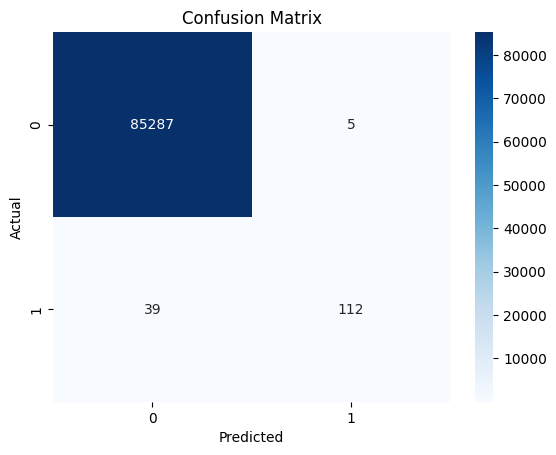

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85292
           1       0.96      0.74      0.84       151

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))
